### Naive Base Classifer to predict Satisfied and Unsatisfied Customers

The yelp review csv was imported into this notebook. Some data prepocessing steps was carried out to clean the data. Exploratory analysi was carried out on the data set to get a better understanding the data distribution.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the csv
data_reviews = pd.read_csv("review_final.csv")
data_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,1Q-ol0RaIe-MmH5Obb_iNg,rYfa3Akt50HehDn2MbwT6w,X-73k3cwBjjc170MOdPa7A,5,0,0,0,While visiting from out of town we visited thi...,5/7/2014 17:11
1,D_I35MhS4yjK2lFzBJVqQg,crKvGu0aiwkTTSX_rxUP8g,CKHAx-EcYP5Q7WxRC1HJjg,5,0,0,0,Perfect place to eat before a show at the Some...,11/3/2018 23:28
2,R1QTSK3s_efKaUgw5SJR-w,YtcUQ_6xWKLWesEjfF75FQ,X-73k3cwBjjc170MOdPa7A,3,0,0,0,Doing a casual tour of all the Vancouver coffe...,9/15/2019 2:08
3,POZwx5nnWn1IOhtq_MKZuQ,l8fMobBPGA7Zvf6sEkl5WQ,Z8XWRWaOnjwuJOWbnnGQ1w,5,0,0,0,"Breakfast, lunch and anytime in between this i...",4/7/2017 12:43
4,FnyhJpVqk6ntrkJc-C8RMA,vhDL0RHifIgEdWytB1yrSg,Z8XWRWaOnjwuJOWbnnGQ1w,4,0,0,0,Great place for a delicious sandwich with high...,10/26/2014 21:13


In [ ]:
# Showing summary statistics of yelp review data
data_reviews.describe()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
count,38759,38759,38759,38759,38759,38759,38759,38759,38759
unique,38144,35011,7328,1546,1566,1547,1574,38719,38536
top,#NAME?,#NAME?,PrsvO1rzkgg6qFizlAoEtg,5,0,0,0,though,however
freq,499,491,491,18686,25971,32743,31042,4,5


In [ ]:
# Checking for nulls and the datatype in each column
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38759 entries, 0 to 38758
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    38759 non-null  object
 1   user_id      38759 non-null  object
 2   business_id  38759 non-null  object
 3   stars        38759 non-null  object
 4   useful       38759 non-null  object
 5   funny        38759 non-null  object
 6   cool         38759 non-null  object
 7   text         38759 non-null  object
 8   date         38759 non-null  object
dtypes: object(9)
memory usage: 2.7+ MB


In [ ]:
# Changing stars column from string to int datatype
data_reviews = pd.DataFrame(data_reviews)
data_reviews['stars'] = pd.to_numeric(data_reviews['stars'], errors='coerce')
data_reviews = data_reviews.replace(np.nan, 1, regex=True)
data_reviews['stars'] = data_reviews['stars'].astype(int)
data_reviews.head()

print (data_reviews)
print (data_reviews.dtypes)


                    review_id  ...              date
0      1Q-ol0RaIe-MmH5Obb_iNg  ...    5/7/2014 17:11
1      D_I35MhS4yjK2lFzBJVqQg  ...   11/3/2018 23:28
2      R1QTSK3s_efKaUgw5SJR-w  ...    9/15/2019 2:08
3      POZwx5nnWn1IOhtq_MKZuQ  ...    4/7/2017 12:43
4      FnyhJpVqk6ntrkJc-C8RMA  ...  10/26/2014 21:13
...                       ...  ...               ...
38754  2Ja39uua-va7Zz0dxurneg  ...  12/29/2018 19:24
38755  vv5yzT1W6W8Ddi8jlt_Jcw  ...   11/3/2019 20:01
38756  0rRZnc8JWHEJZfdGIc3FCg  ...   6/16/2020 21:16
38757  bnwF5gtYpzsU3KPhEsyh6w  ...  11/29/2019 12:48
38758  EhEbeuAI7sdOy3bEqHmjmg  ...    4/30/2019 0:02

[38759 rows x 9 columns]
review_id      object
user_id        object
business_id    object
stars           int64
useful         object
funny          object
cool           object
text           object
date           object
dtype: object


In [ ]:
# Checking for nulls
data_reviews.isnull()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
38754,False,False,False,False,False,False,False,False,False
38755,False,False,False,False,False,False,False,False,False
38756,False,False,False,False,False,False,False,False,False
38757,False,False,False,False,False,False,False,False,False


In [ ]:
# Displaying text review from the column text
data_reviews.text[0]

"While visiting from out of town we visited this coffee shop every day.  I like the ceramic cups when you order in.  I hate the cheap paper cups of the big name coffee establishments.  I don't get how they can serve you a $5 coffee in a paper cup??  We had their fresh baked goods and all were amazing!"

In [ ]:
# Retrieving the length of the reviews in  each row 
data_reviews['length'] = data_reviews.text.apply(len)

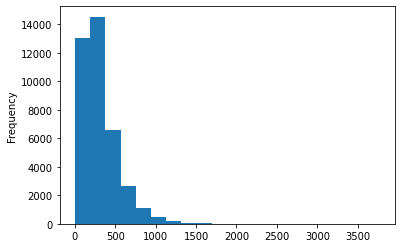

In [ ]:
# Histogram showin the length of reviews
data_reviews.length.plot(bins = 20, kind='hist')

In [ ]:
# Summary Statistics showing the min and max length of reviews
data_reviews.length.describe()

count    38759.000000
mean       316.166310
std        232.167239
min          1.000000
25%        157.000000
50%        257.000000
75%        408.000000
max       3767.000000
Name: length, dtype: float64

In [ ]:
# From summary stat max length is 2411, display text 
data_reviews[data_reviews.length==3767].text.iloc[0]

"Made reservations via OpenTable for a birthday celebration.  There was only a large table outside on the patio with people and two people inside.  There were two waitress and one manager.  Our waitress took our drink order and we asked to start with the meatballs. The guys can beers came quickly while the ladies waited on their wine and cocktails. Then two large groups came in and we lost our waitress.  When the manager came over to see how we were we asked if we could order.  She took our order.  Everyone on the table ordered and then the manager told us about the steak special. Bragging about some new chef from Chicago. As such, two people changed their order.  She didn't ask how they wanted their steak which I thought was odd.  A couple of minutes later the waitress came and asked for the chef.  The birthday girl ordered the pork chops.  The menu stated pork chop, heirloom tomatoes with spinach. When the food showed up the heirloom tomatoes had pesto on them  No where was pesto lis

In [ ]:
# From summary statistic min length is 4, display text 
data_reviews[data_reviews.length == 4].text.iloc[0]

' and'

In [ ]:
reviews_df.dropna()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Udtn5NN5MWVUiUtn0lYSHQ,Fz1Dywsw1f6mzQCxh_Vnow,GhJvfGlMO10kUvOUz3Mk8g,1.0,0,0,0,Just awful! I went there today and bought 3 sa...,11/3/2018 18:32,506
1,0pMv5FM10Tq0Q0FMcRUGQg,1xCp--RYe6ijkZXqreUXaw,5AAbKTyJSyLzhJmU9PPc2Q,1.0,1,1,0,A had to give a star but really nothing good a...,10/15/2014 3:00,208
2,1Q-ol0RaIe-MmH5Obb_iNg,rYfa3Akt50HehDn2MbwT6w,X-73k3cwBjjc170MOdPa7A,5.0,0,0,0,While visiting from out of town we visited thi...,5/7/2014 17:11,301
4,#NAME?,kEUofFXFprWXieYZEBfXMw,OPfgKOm_n-ajUo3qjSEgRg,5.0,0,0,0,It is exactly what book heaven is suppose to l...,9/29/2014 22:40,92
5,of7-aqFFpwVSw5Nfr9-lCg,PP4f5o46hXnuvzRJaFXoDQ,OPfgKOm_n-ajUo3qjSEgRg,4.0,0,0,0,"Excellent place to relax, sip on coffee, and r...",10/31/2012 18:56,60
...,...,...,...,...,...,...,...,...,...,...
4995,m4XXtbeHFX97B_Uvx_KSeQ,XxUA8KvvdCvnxi72Ro9pSg,03o1CqC4vkPbEvS02AnZXg,4.0,0,0,0,"I'm a fan, and don't get me wrong, the gelato ...",8/20/2015 2:14,1081
4996,-52oSYk2WSPd8DWLIxalSQ,c_u4XuNK1u1AfPOuwFnnNg,ir04wuNU2pViqn-LnkMsYg,5.0,1,1,1,This is my favorite place to get coffee. Perio...,6/12/2014 13:40,186
4997,sw_QF-Is9yzQ863AW2UyFA,bmInmP_8TeCdeiEyr0fcvg,ir04wuNU2pViqn-LnkMsYg,5.0,1,0,1,Top notch traditional machiatto and they serve...,6/29/2014 2:31,136
4998,MfCBKFpeLfwMp-Ib_dvhRA,bCXfPxI_QC4gXt1qmU8Aww,gqrOBvj-ffGnNn3ygqVteA,5.0,1,0,0,This place was so unique! If you like differen...,3/18/2016 0:38,493


In [ ]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38759 entries, 0 to 38758
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    38759 non-null  object
 1   user_id      38759 non-null  object
 2   business_id  38759 non-null  object
 3   stars        38759 non-null  int64 
 4   useful       38759 non-null  object
 5   funny        38759 non-null  object
 6   cool         38759 non-null  object
 7   text         38759 non-null  object
 8   date         38759 non-null  object
 9   length       38759 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.0+ MB


In [ ]:
data_reviews.describe()

,stars,length
count,38759.000000,38759.000000
mean,3.769602,316.166310
std,1.554840,232.167239
min,0.000000,1.000000
25%,3.000000,157.000000
50%,4.000000,257.000000
75%,5.000000,408.000000
max,5.000000,3767.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


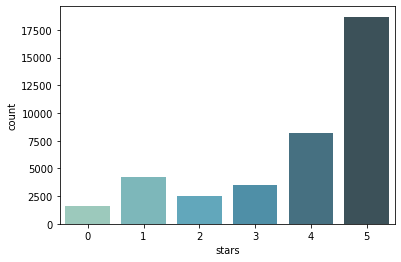

In [ ]:
# Bar chart showing the count of each review (1 - 5)

sns.countplot(data_reviews.stars, palette='GnBu_d')

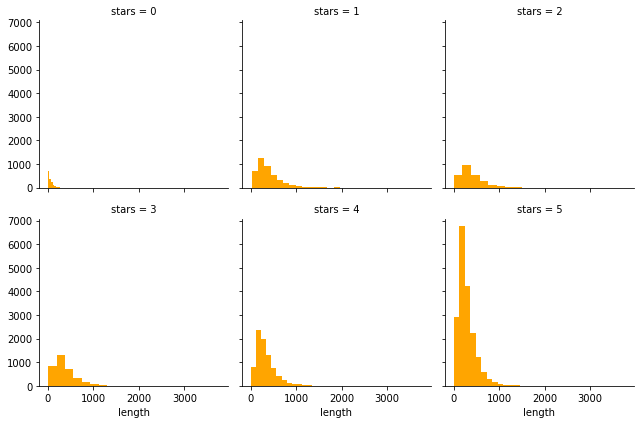

In [ ]:
# Histogram for each star review 
g =sns.FacetGrid(data =data_reviews,col='stars',col_wrap=3)
g.map(plt.hist,'length',bins=20,color='orange')

The histograms above shows that most customers that write 1, 2, 3 stars write less than 1,000 words.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


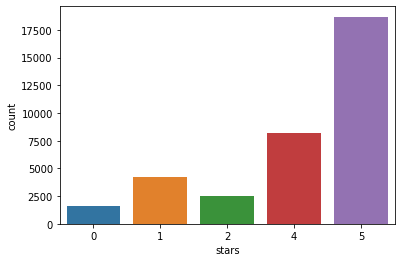

In [ ]:
# excluding stars in the 3 star group, bar chart displayed
sns.countplot(data_reviews[data_reviews.stars!=3].stars)

Grouping 4 & 5 stars as 1 which represents Satisfied Customers and 0, 1 & 2 stars as 0 which represents dissatisfied customers. This analysis considers 3 star reviews as neutral reviews. 3 star reviews are excluded from the data.

In [ ]:
# Removing rows with 3 star reviews
data_reviews = data_reviews[data_reviews.stars!=3]

In [ ]:
# User defined function created to group 4 and 5 star as 1. Also group 1 and 2 stars as 0
def create_target(stars):
    if stars < 3:
        target = 0#
    else:
        target = 1
    return target

In [ ]:
# Target column created from udf create_target
data_reviews['target'] = data_reviews.stars.apply(create_target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# display the dataframe for stars and target columns
data_reviews[['stars','target']]

,stars,target
0,5,1
1,5,1
3,5,1
4,4,1
5,2,0
...,...,...
38754,5,1
38755,1,0
38756,5,1
38757,2,0


In [ ]:
# Punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# user defined fuction to remove punctuations & stop words
def text_cleaning(text):
    remove_punctuation = ''.join([char for char in text if char not in string.punctuation])
    remove_stopwords = [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')]
    return remove_stopwords

In [ ]:
# count vectorization ( 2d matrix containing word frequency)
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer(analyzer = text_cleaning)
review_vectorizer=CountVectorizer.fit_transform(data_reviews.text)

In [ ]:
review_vectorizer.shape

(35277, 44193)

In [ ]:
X =review_vectorizer
y = data_reviews.target.values.reshape(-1,1)
print(X.shape)
print(y.shape)

(35277, 44193)
(35277, 1)


In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)

In [ ]:
# train model
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train.ravel())

MultinomialNB()

In [ ]:
# make class predictions
# y_pred_class = nb.predict(X_test)
predict_train = NB_classifier.predict(X_train)

[[ 5170  1516]
 [  587 20948]]


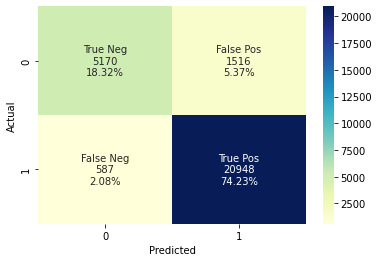

In [ ]:
# print the confusion matrix for trained data
from sklearn.metrics import classification_report,confusion_matrix
predict_train = NB_classifier.predict(X_train)
cf_matrix = confusion_matrix(y_train,predict_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt= '', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
print(cf_matrix)

In [ ]:
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      6686
           1       0.93      0.97      0.95     21535

    accuracy                           0.93     28221
   macro avg       0.92      0.87      0.89     28221
weighted avg       0.92      0.93      0.92     28221



[[1219  466]
 [ 249 5122]]


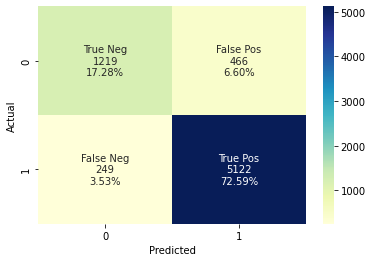

In [ ]:
# print the confusion matrix for test data
predict_test = NB_classifier.predict(X_test)
cf_matrix = confusion_matrix(y_test,predict_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt= '', cmap='YlGnBu')
#sns.heatmap(cm,annot =True,cmap="YlGnBu")
plt.ylabel("Actual")
plt.xlabel("Predicted")
print(cf_matrix)

In [ ]:
# make class predictions for X_test
predictor = NB_classifier.predict(X_test)

In [ ]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, predictor)

0.8986678004535147

The accuracy of the model on the test data is TP + TN / (TP + FP + TN + FN)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_test).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (5122 + 1219) / (5122 + 466 + 1219 + 249)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8986678004535147


In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1685
           1       0.92      0.95      0.93      5371

    accuracy                           0.90      7056
   macro avg       0.87      0.84      0.85      7056
weighted avg       0.90      0.90      0.90      7056

